# **Maximing Points Redemption**

### _tl:dr; I saved 35% by redeeming credit card points for gift cards instead of buying new AirPods on the rewards portal._

In the need of a new set of AirPod Pros, I used data to determine the best value for my points.

How did this breakdown?
* With a total of `49037` redeemable points
* If ordering directly from rewards portal, that would be `39700` points
* Based on my analysis, redeeming for Apple gift card and using those was better value for money.
* I redeemed `22500` points to get `$250` in Apple gift cards
* I spent `$249` to buy new AirPod Pros

### The math:
Points used, if ordering AirPods directly from rewards portal
```
39700 / 49037 = 81% of total points
```
Points used, to purchase Apple gift cards
```
2 * 100 + 1 * 50 = $250 dollars
2 * 9000 + 1 * 4500 = 22500 points
22500 / 49037 = 46% of total points
```

In [1]:
# imports + init
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Data

Data collection required looking up the product on the rewards portal, matching it up with price on the Apple website.

*Notes:*
*   Points & prices as on Nov 18th, 2023
*   The M2 MacBook Pro is no longer available to order, so Googled historical price
*   10% discounted gift card, offer valid until Jan 1st, 2024

In [2]:
# load data from csv
df = pd.read_csv('files/data.csv')

**16 products are redeemable**, not including gift cards, with 49037 points.

In [3]:
# filter out gift cards
points_list = df[3:]
# find all eligible Apple products
points_list = points_list[points_list['points'] < 49037]
print(f'Use points for: {len(points_list)} products')
points_list.sort_values(by=['points'])

Use points for: 16 products


,type,product,points,price
3,ACCESSORY,35W Dual USB-C Port Compact Power Adapter,12400,59.0
4,ACCESSORY,USB SuperDrive,15300,79.0
5,ACCESSORY,96W USB-C Power Adapter,15300,79.0
6,ACCESSORY,HomePod mini,18100,99.0
13,TV,Apple TV 4K WiFi 64GB,22500,129.0
18,HEADPHONE,AirPods - 2nd Gen,22500,129.0
7,ACCESSORY,Magic Keyboard with Numeric Keypad,22800,129.0
8,ACCESSORY,Magic Trackpad - White,22800,129.0
14,TV,Apple TV 4K WiFi/Ethernet 128GB,25300,149.0
9,ACCESSORY,Smart Keyboard for iPad (9th Gen),27100,159.0


### Value For Money ($ per point)

The graph shows $ per point. The value for money is when purchasing gift cards, 1.11¢ per point. The rest of products are clustered in 0.05¢-0.07¢ per point range.

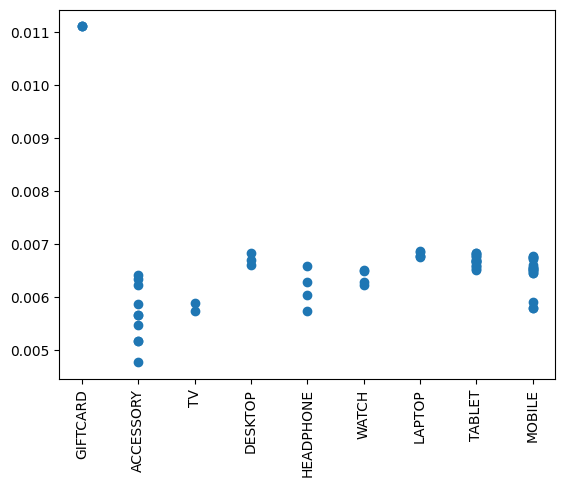

In [4]:
# get x & compute y data
x = df['type']
y = df['price']/df['points']

# plot points
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.show()

### Buying Decision

With 49037 points to be redeemed, gift cards allowed maximing value.

Final purchase:
*   3 x $25 Apple Gift Card = $75
*   3 x $50 Apple Gift Card = $150
*   3 x $100 Apple Gift Card = $300
*   Total Gift Card Value = $525

$525 in Apple gift cards, allows purchase of **8 additional products**.

In [6]:
# filter out gift cards
price_list = df[3:]
# find how many total purchasable products of value < $525.00
price_list = price_list[price_list["price"] < 525.00]
print(f'Use Apple gift cards for: {len(price_list)} total ({len(price_list) - len(points_list)} additional) products')

# filter out gift cards
price_list = df[3:]
# find additional purchasable products, of value > 49037 (current points) and < $525 (value in gift cards)
price_list = price_list[(price_list['points'] > 49037) & (price_list['price'] < 525.00)]
price_list.sort_values(by=['price'])

Use Apple gift cards for: 24 total (8 additional) products


,type,product,points,price
12,ACCESSORY,"12.9"" Magic Keyboard for iPad Pro (6th Gen)",54400,349.0
24,WATCH,Apple Watch Series 9 GPS 41mm,61600,399.0
25,WATCH,Apple Watch Series 9 GPS 45mm,66000,429.0
48,MOBILE,iPhone SE 64GB - 3rd Gen,66100,429.0
31,TABLET,"10.9"" iPad WiFi 64GB - 10th Gen",69100,449.0
32,TABLET,"10.2"" iPad WiFi 256GB - 9th Gen",73400,479.0
49,MOBILE,iPhone SE 128GB - 3rd Gen,73300,479.0
33,TABLET,iPad mini WiFi 64GB - 6th Gen,76000,499.0
